In [6]:
from sys import stdout

import random
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

from sklearn.metrics import confusion_matrix

Seismic grayscale image shape: (2664, 4166, 3)
Fault mask shape: (2664, 4166)


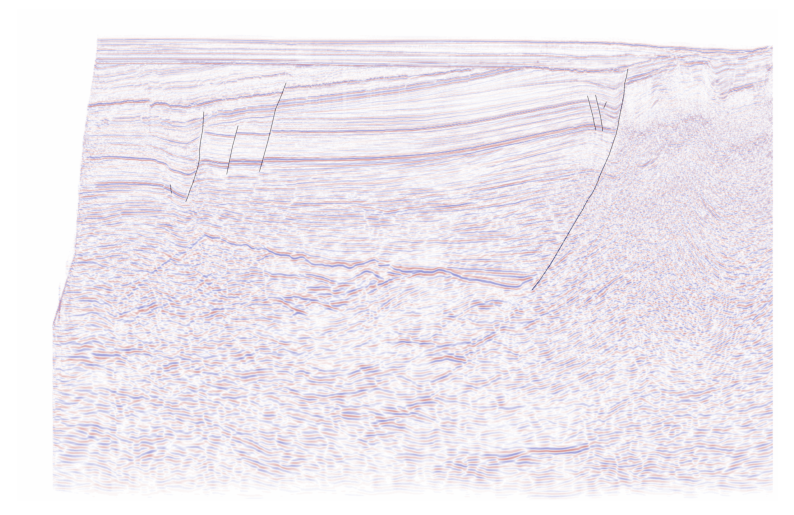

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Function to load the seismic and fault images
def load_data(seismic_path, fault_path):
    # Read the seismic image (RGB)
    seismic_img = mpimg.imread(seismic_path)
    
    # Read the fault mask image (assumed to be in grayscale or RGB format)
    fault_img = mpimg.imread(fault_path)
    
    # # Convert the seismic image (RGB) to grayscale using the luminosity method
    # # Grayscale = 0.2989 * R + 0.5870 * G + 0.1140 * B
    # grayscale_seismic = 0.2989 * seismic_img[:, :, 0] + 0.5870 * seismic_img[:, :, 1] + 0.1140 * seismic_img[:, :, 2]
    
    # Convert fault mask to grayscale if it has 3 channels
    if len(fault_img.shape) == 3:  # Check if RGB
        fault_img = 0.2989 * fault_img[:, :, 0] + 0.5870 * fault_img[:, :, 1] + 0.1140 * fault_img[:, :, 2]
    
    # Normalize the fault mask to [0, 1]
    fault_mask_grayscale = (fault_img - fault_img.min()) / (fault_img.max() - fault_img.min())    
    
    return seismic_img, fault_mask_grayscale

# Example usage with a single pair of images
seismic_path = os.path.join('seismics1', 'seismic-1184.png')
fault_path = os.path.join('faults', 'fault-1184.png')

# Load the seismic and fault data
seismic_img, fault_mask_grayscale = load_data(seismic_path, fault_path)

# Check the shape of the data
print(f"Seismic grayscale image shape: {seismic_img.shape}")
print(f"Fault mask shape: {fault_mask_grayscale.shape}")

# Visualize the grayscale seismic image and overlay the fault mask
plt.figure(figsize=(10, 10))

# Display the grayscale seismic image
plt.imshow(seismic_img, alpha=1.0)  # Seismic image in grayscale
plt.axis('off')  # Hide axis

# Overlay the fault mask with transparency (grayscale)
plt.imshow(fault_mask_grayscale, cmap='gray', alpha=0.6)  # Fault mask in grayscale
plt.axis('off')  # Hide axis

# Show the result
plt.show()


In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

# Define the paths to your seismic and fault image folders
seismic_dir = r'seismics1'
fault_dir = r'faults'

# Function to load images and limit to 100 images
def load_images(seismic_dir, fault_dir, limit=200, img_size=(256, 256)):
    seismic_images = []
    fault_masks = []
    
    # Get all seismic image filenames (assuming they are .png files)
    seismic_files = [f for f in os.listdir(seismic_dir) if f.endswith('.png')][:limit]
    fault_files = [f for f in os.listdir(fault_dir) if f.endswith('.png')][:limit]
    
    # Iterate over the files and load them
    for seismic_file, fault_file in zip(seismic_files, fault_files):
        # Load seismic image and fault mask
        seismic_img_path = os.path.join(seismic_dir, seismic_file)
        fault_img_path = os.path.join(fault_dir, fault_file)
        
        # Load the seismic image (convert to grayscale if needed)
        seismic_img = image.load_img(seismic_img_path, target_size=img_size)
        seismic_img = image.img_to_array(seismic_img) / 255.0  # Normalize to [0, 1]
        
        # Load the fault mask image (assuming binary mask)
        fault_img = image.load_img(fault_img_path, target_size=img_size, color_mode='grayscale')
        fault_img = image.img_to_array(fault_img) / 255.0  # Normalize to [0, 1]
        
        seismic_images.append(seismic_img)
        fault_masks.append(fault_img)
    
    return np.array(seismic_images), np.array(fault_masks)

X, y = load_images(seismic_dir, fault_dir, limit=200, img_size=(256, 256))  # Resize to (64, 64)

# Check the shape of loaded data
print(f"Seismic images shape: {X.shape}")
print(f"Fault masks shape: {y.shape}")



Seismic images shape: (200, 256, 256, 3)
Fault masks shape: (200, 256, 256, 1)


In [7]:
# Split the data into training, validation, and test sets (80-10-10 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Check the shape of training and validation sets
print(f"Training data size: {X_train.shape}")
print(f"Validation data size: {X_val.shape}")
print(f"Test data size: {X_test.shape}")

Training data size: (144, 256, 256, 3)
Validation data size: (16, 256, 256, 3)
Test data size: (40, 256, 256, 3)


In [ ]:
CNN

In [8]:

# Build a simple CNN model for pixel-wise segmentation
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(256, 256, 3)),  # Input layer (grayscale images of size 64x64)
    
    # Convolutional layers with activation and pooling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # Upsampling to bring the output back to the original size
    tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=2, padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=2, padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=2, padding='same', activation='relu'),
    
    # Final layer with 1 channel (for binary segmentation), sigmoid activation
    tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,  # Training data and labels
    epochs=10,         # Number of epochs
    batch_size=8,      # Batch size (you can adjust this based on your memory)
    validation_data=(X_val, y_val),  # Validation data
    verbose=1
)

W0000 00:00:1731810680.933351   21508 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 64, 64, 128)    │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 128, 128, 64)   │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 256, 256, 32)   │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 256, 256, 1)    │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,121 (1.27 MB)

 Trainable params: 333,121 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 281ms/step - accuracy: 0.8907 - loss: 0.4645 - val_accuracy: 0.9997 - val_loss: 0.0250
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 267ms/step - accuracy: 0.9997 - loss: 0.0311 - val_accuracy: 0.9997 - val_loss: 0.0198
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 264ms/step - accuracy: 0.9997 - loss: 0.0147 - val_accuracy: 0.9997 - val_loss: 0.0036
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 265ms/step - accuracy: 0.9997 - loss: 0.0036 - val_accuracy: 0.9997 - val_loss: 0.0028
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 264ms/step - accuracy: 0.9997 - loss: 0.0027 - val_accuracy: 0.9997 - val_loss: 0.0025
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 267ms/step - accuracy: 0.9997 - loss: 0.0023 - val_accuracy: 0.9997 - val_loss: 0.0025
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 267ms/step - accuracy: 0.9997 - loss: 0.0027 - val_accuracy: 0.9997 - val_loss: 0.0025
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 266ms/step - accuracy: 0.9997 - loss: 0.0024 - val_accuracy: 0.

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step
Predictions shape: (40, 256, 256, 1)
Binary Predictions shape: (40, 256, 256, 1)


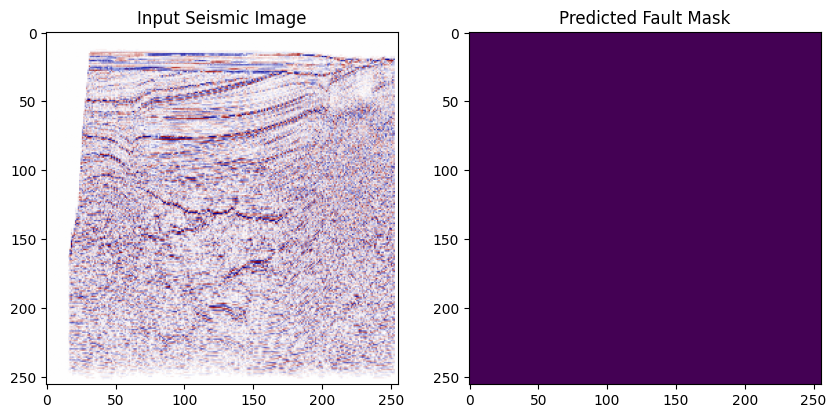

In [9]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Check the shape of predictions
print(f"Predictions shape: {predictions.shape}")  # Should be (num_samples, 64, 64, 1)

# Convert predictions to binary values (0 or 1) using a threshold of 0.5
predictions_binary = (predictions > 0.5).astype(np.uint8)

# Check the shape of binary predictions
print(f"Binary Predictions shape: {predictions_binary.shape}")  # Should also be (num_samples, 64, 64, 1)

# If you want to visualize the first prediction, you can do something like this:
import matplotlib.pyplot as plt

# Visualize the first prediction (image and corresponding mask)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X_test[0].squeeze())  # Input seismic image (grayscale)
plt.title("Input Seismic Image")

plt.subplot(1, 2, 2)
plt.imshow(predictions_binary[1].squeeze())  # Predicted mask (binary)
plt.title("Predicted Fault Mask")

plt.show()

In [ ]:
UNET (VER1)

In [11]:
class UNet(tf.keras.Model):
    def __init__(self, num_classes=1, input_size=(256, 256, 3)):
        super(UNet, self).__init__()

        # Encoder: Convolutions and Pooling
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_size),
            tf.keras.layers.MaxPooling2D((2, 2)),
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.MaxPooling2D((2, 2)),
            tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.MaxPooling2D((2, 2)),
        ])

        # Decoder: Upsampling with skip connections
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=2, padding='same', activation='relu'),
            tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=2, padding='same', activation='relu'),
            tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=2, padding='same', activation='relu'),
        ])

        # Final output layer for segmentation (single channel, sigmoid activation)
        self.final_conv = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')

    def call(self, inputs):
        # Encoder path
        x1 = self.encoder(inputs)

        # Decoder path
        x2 = self.decoder(x1)

        # Output layer
        return self.final_conv(x2)


In [17]:
from tensorflow.keras.applications import ResNet50

class UNetResnet(tf.keras.Model):
    def __init__(self, num_classes=1, input_size=(256, 256, 3)):
        super(UNetResnet, self).__init__()
        base_model = ResNet50(input_shape=input_size, include_top=False, weights='imagenet')
        self.encoder = tf.keras.Model(inputs=base_model.input, outputs=base_model.get_layer("conv4_block6_out").output)

        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=2, padding='same', activation='relu'),
            tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=2, padding='same', activation='relu'),
            tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=2, padding='same', activation='relu'),
        ])
        
        self.final_conv = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')  # Binary output

    def call(self, inputs):
        x1 = self.encoder(inputs)
        x2 = self.decoder(x1)
        return self.final_conv(x2)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator with augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Fit the generator on training data
datagen.fit(X_train)  # Fit augmentation on your training images

def dice_loss(y_true, y_pred):
    smooth = 1e-6
    intersection = tf.reduce_sum(y_true * y_pred)
    return 1 - (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

# Compile with Dice Loss
model.compile(optimizer='adam', loss=dice_loss, metrics=['accuracy'])


# Example of training with validation data
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 873ms/step - accuracy: 0.9997 - loss: 1.3442e-04 - val_accuracy: 0.9997 - val_loss: 1.3590e-04
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 832ms/step - accuracy: 0.9997 - loss: 1.3281e-04 - val_accuracy: 0.9997 - val_loss: 1.3590e-04
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 836ms/step - accuracy: 0.9997 - loss: 1.3586e-04 - val_accuracy: 0.9997 - val_loss: 1.3590e-04
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 831ms/step - accuracy: 0.9997 - loss: 1.2899e-04 - val_accuracy: 0.9997 - val_loss: 1.3590e-04
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 835ms/step - accuracy: 0.9998 - loss: 1.2465e-04 - val_accuracy: 0.9997 - val_loss: 1.3590e-04
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 829ms/step - accuracy: 0.9997 - loss: 1.3659e-04 - val_accuracy: 0.9997 - val_loss: 1.3590e-04
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 826ms/step - accuracy: 0.9997 - loss: 1.3408e-04 - val_accuracy: 0.9997 - val_loss: 1.3590e-04
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 832ms/step - accuracy: 

Prediction 1 values: min=1, max=1
Prediction 1 shape: (256, 256, 1)
Prediction 2 values: min=1, max=1
Prediction 2 shape: (256, 256, 1)
Prediction 3 values: min=1, max=1
Prediction 3 shape: (256, 256, 1)
Prediction 4 values: min=1, max=1
Prediction 4 shape: (256, 256, 1)
Prediction 5 values: min=1, max=1
Prediction 5 shape: (256, 256, 1)


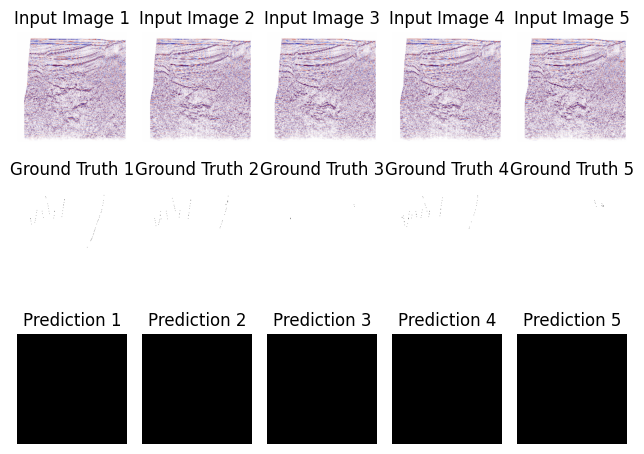

In [30]:
import matplotlib.pyplot as plt

# Visualize the first few predictions along with their ground truth masks
for i in range(5):
    # Display the input image (seismic data)
    plt.subplot(3, 5, i+1)  # Use a 3x5 grid
    plt.imshow(X_test[i], cmap='gray')  # Seismic data, often grayscale
    plt.title(f"Input Image {i+1}")
    plt.axis('off')  # Hide axes
    
    # Display the ground truth mask
    plt.subplot(3, 5, i+6)  # Move the masks to the next row
    plt.imshow(y_test[i].squeeze(), cmap='gray')  # Ground truth (binary mask)
    plt.title(f"Ground Truth {i+1}")
    plt.axis('off')
    
    prediction = predictions_binary[i].squeeze()
    if prediction.max() <= 1:  # If the predicted mask is a probability map (values between 0 and 1)
        prediction = (prediction > 0.5).astype(np.uint8)  # Apply threshold to create a binary mask
    print(f"Prediction {i+1} values: min={predictions_binary[i].min()}, max={predictions_binary[i].max()}")
    print(f"Prediction {i+1} shape: {predictions_binary[i].shape}")

    # Display the predicted mask
    plt.subplot(3, 5, i+11)  # Correct the index to fit the 3x5 grid
    plt.imshow(prediction, cmap='gray')  # Predicted mask (after thresholding)
    plt.title(f"Prediction {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
UNET(VER2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to check the range of values in the seismic and fault images and visualize samples
def check_color_mapping(X, y, num_samples=5):
    for i in range(num_samples):
        print(f"Sample {i+1}:")
        
        # Get unique values in the fault mask
        unique_vals = np.unique(y[i])
        print(f"Fault Mask Unique Values: {unique_vals}")
        
        # Count pixels for each unique value
        for val in unique_vals:
            count = np.sum(y[i] == val)
            if val == 0:
                print(f" - {count} pixels correspond to 0 (black, background)")
            elif val == 1:
                print(f" - {count} pixels correspond to 1 (white, fault)")
        
        # Print range of values for seismic images
        print(f"Seismic Image Range: {X[i].min()} to {X[i].max()}")
        print(f"Fault Mask Range: {y[i].min()} to {y[i].max()}")
        print("-" * 50)

        # Optional: visualize seismic image and fault mask
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(X[i].squeeze(), cmap='gray')  # Seismic image
        plt.title("Seismic Image")
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(y[i].squeeze(), cmap='gray')  # Fault mask
        plt.title("Fault Mask")
        plt.axis('off')
        
        plt.show()

# Example usage
check_color_mapping(X, y, num_samples=3)


In [ ]:
import matplotlib.pyplot as plt

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [31]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")


Training set size: (160, 256, 256, 3)
Validation set size: (40, 256, 256, 3)


In [32]:
from tensorflow.keras import layers, models

def unet_model(input_shape=(256, 256, 3)):
    inputs = layers.Input(input_shape)

    # Contracting path (downsampling)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Expansive path (upsampling)
    u6 = layers.Conv2DTranspose(512, (3, 3), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    # Output layer
    output = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[output])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Build the U-Net model
model = unet_model(input_shape=(256, 256, 3))  # Adjust for grayscale or RGB input
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 256, 256,  │      1,792 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 128, 128,  │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d_3[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 64, 64,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_4[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_8[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 32, 32,    │          0 │ conv2d_9[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_5[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 32, 32,    │  2,359,808 │ conv2d_10[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 16, 16,    │          0 │ conv2d_11[0][0]   │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_6[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 16, 16,    │  9,438,208 │ conv2d_12[0][0]   │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_3  │ (None, 32, 32,    │  4,719,104 │ conv2d_13[0][0]   │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32, 32,    │          0 │ conv2d_transpose

 Total params: 34,513,345 (131.66 MB)

 Trainable params: 34,513,345 (131.66 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=8, validation_data=(X_val, y_val))

# Save the model if needed
model.save("unet_seismic_fault_detection.h5")


Epoch 1/20


/home/participant6/venv/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_11']. Received: the structure of inputs=*
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 96s 5s/step - accuracy: 0.9996 - loss: 0.1909 - val_accuracy: 0.9997 - val_loss: 0.0027
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 92s 5s/step - accuracy: 0.9998 - loss: 0.0023 - val_accuracy: 0.9997 - val_loss: 0.0026
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 97s 5s/step - accuracy: 0.9997 - loss: 0.0026 - val_accuracy: 0.9997 - val_loss: 0.0026
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 93s 5s/step - accuracy: 0.9997 - loss: 0.0024 - val_accuracy: 0.9997 - val_loss: 0.0026
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 93s 5s/step - accuracy: 0.9997 - loss: 0.0025 - val_accuracy: 0.9997 - val_loss: 0.0026
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 92s 5s/step - accuracy: 0.9997 - loss: 0.0028 - val_accuracy: 0.9997 - val_loss: 0.0025
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 97s 5s/step - accuracy: 0.9998 - loss: 0.0023 - val_accuracy: 0.9997 - val_loss: 0.0025
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 93s 5s/step - accuracy: 0.9997 - loss: 0.0025 - val_accuracy: 0.9997 - val_loss: 0.0025
Epo

In [34]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation loss: {loss}, Validation accuracy: {accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9997 - loss: 0.0026
Validation loss: 0.002526832977309823, Validation accuracy: 0.9997226595878601


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


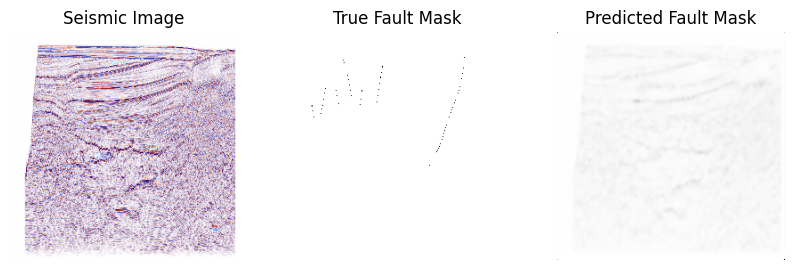

In [35]:
# Make predictions on a sample from the validation set
sample = X_val[0:1]
predictions = model.predict(sample)

# Plot the original seismic image, true fault mask, and predicted fault mask
plt.figure(figsize=(10, 10))

# Display the original seismic image
plt.subplot(1, 3, 1)
plt.imshow(sample[0], cmap='gray')
plt.title("Seismic Image")
plt.axis('off')

# Display the true fault mask
plt.subplot(1, 3, 2)
plt.imshow(y_val[0], cmap='gray')
plt.title("True Fault Mask")
plt.axis('off')

# Display the predicted fault mask
plt.subplot(1, 3, 3)
plt.imshow(predictions[0], cmap='gray')
plt.title("Predicted Fault Mask")
plt.axis('off')

plt.show()
